<a href="https://colab.research.google.com/github/Bhavin52/Case_Study/blob/main/logistic_regression_Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import pandas as pd 
import numpy  as np
import matplotlib.pyplot as plt

In [57]:
claimants = pd.read_csv("/content/claimants.csv")

In [58]:
claimants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CASENUM   1340 non-null   int64  
 1   ATTORNEY  1340 non-null   int64  
 2   CLMSEX    1328 non-null   float64
 3   CLMINSUR  1299 non-null   float64
 4   SEATBELT  1292 non-null   float64
 5   CLMAGE    1151 non-null   float64
 6   LOSS      1340 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 73.4 KB


In [59]:
claimants.head() # to see top 10 observations

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


In [60]:
claimants.isnull().sum()

CASENUM       0
ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
count,1340.000000,1340.000000,1328.000000,1299.000000,1292.000000,1151.000000,1340.000000
mean,11202.001493,0.488806,0.558735,0.907621,0.017028,28.414422,3.806307
std,9512.750796,0.500061,0.496725,0.289671,0.129425,20.304451,10.636903
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4177.000000,0.000000,0.000000,1.000000,0.000000,9.000000,0.400000
50%,8756.500000,0.000000,1.000000,1.000000,0.000000,30.000000,1.069500
75%,15702.500000,1.000000,1.000000,1.000000,0.000000,43.000000,3.781500
max,34153.000000,1.000000,1.000000,1.000000,1.000000,95.000000,173.604000


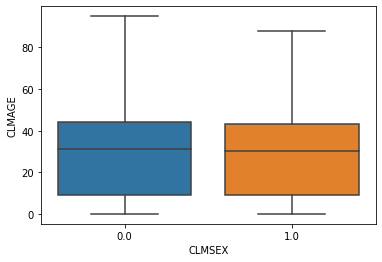

In [61]:
import seaborn as sns
sns.boxplot(x="CLMSEX",y="CLMAGE",data=claimants)
claimants.describe()

In [62]:
claimants.apply(lambda x:x.mean()) 
claimants.mean()

CASENUM     11202.001493
ATTORNEY        0.488806
CLMSEX          0.558735
CLMINSUR        0.907621
SEATBELT        0.017028
CLMAGE         28.414422
LOSS            3.806307
dtype: float64

In [63]:
claimants.ATTORNEY.value_counts()
claimants.ATTORNEY.value_counts().index[0]

0

In [64]:
#Imputating the missing values with most repeated values in that column
# lambda x:x.fillna(x.value_counts().index[0]) 
# the above line gives you the most repeated value in each column 

In [65]:
claimants.ATTORNEY.value_counts()
claimants.ATTORNEY.value_counts().index[0] # gets you the most occuring value

0

In [66]:
claimants.CLMSEX.value_counts()
claimants.CLMSEX.value_counts().index[0] # gets you the most occuring value
claimants.isnull().sum()

CASENUM       0
ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [67]:
# filling the missing value with most occuring value    
claimants.iloc[:,0:4] = claimants.iloc[:,0:4].apply(lambda x:x.fillna(x.value_counts().index[0]))
claimants.isnull().sum()

CASENUM       0
ATTORNEY      0
CLMSEX        0
CLMINSUR      0
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [68]:
#claimants.SEATBELT = claimants.SEATBELT.fillna(claimants.SEATBELT.value_counts().index[0])

claimants.iloc[:,0:4].columns

claimants.CLMAGE = claimants.CLMAGE.fillna(claimants.CLMAGE.mean())

In [69]:
# filling the missing value with mean of that column
claimants.iloc[:,4:] = claimants.iloc[:,4:].apply(lambda x:x.fillna(x.mean()))

In [70]:
# Checking if we have na values or not 
claimants.isnull().sum() # No null values

CASENUM     0
ATTORNEY    0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64

In [71]:
#Model building 

In [72]:
import statsmodels.formula.api as sm
logit_model = sm.logit('ATTORNEY~CLMAGE+LOSS+CLMINSUR+CLMSEX+SEATBELT',data = claimants).fit()

Optimization terminated successfully.
         Current function value: 0.609099
         Iterations 7


In [73]:
from scipy import stats
import scipy.stats as st
st.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

In [74]:
#summary
logit_model.summary()
y_pred = logit_model.predict(claimants)

In [75]:
claimants["pred_prob"] = y_pred
# Creating new column for storing predicted class of Attorney

In [76]:
# filling all the cells with zeroes
claimants["Att_val"] = np.zeros(1340)


In [77]:
# taking threshold value as 0.5 and above the prob value will be treated 
# as correct value 
claimants.loc[y_pred>=0.5,"Att_val"] = 1
claimants.Att_val

0       0.0
1       1.0
2       1.0
3       0.0
4       1.0
       ... 
1335    1.0
1336    0.0
1337    1.0
1338    0.0
1339    1.0
Name: Att_val, Length: 1340, dtype: float64

In [78]:
# confusion matrix 
confusion_matrix_0 = pd.crosstab(claimants['ATTORNEY'],claimants.Att_val)
confusion_matrix_0

Att_val,0.0,1.0
ATTORNEY,,
0,436,249
1,151,504


In [79]:
accuracy = (436+504)/(1340) 
accuracy

0.7014925373134329

In [80]:
# ROC curve 
from sklearn import metrics
# fpr => false positive rate
# tpr => true positive rate
fpr, tpr, threshold = metrics.roc_curve(claimants.ATTORNEY, y_pred)

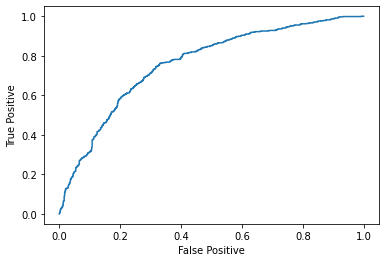

In [81]:
# the above function is applicable for binary classification class 

plt.plot(fpr,tpr);plt.xlabel("False Positive");plt.ylabel("True Positive")
 
roc_auc = metrics.auc(fpr, tpr) # area under ROC curve 

In [82]:
### Dividing data into train and test data sets
claimants.drop("Att_val",axis=1,inplace=True)
from sklearn.model_selection import train_test_split

In [83]:
train,test = train_test_split(claimants,test_size=0.3)

In [84]:
# checking na values 
train.isnull().sum();test.isnull().sum()

CASENUM      0
ATTORNEY     0
CLMSEX       0
CLMINSUR     0
SEATBELT     0
CLMAGE       0
LOSS         0
pred_prob    0
dtype: int64

In [85]:
train_model = sm.logit('ATTORNEY~CLMAGE+LOSS+CLMINSUR+CLMSEX+SEATBELT',data = train).fit()

Optimization terminated successfully.
         Current function value: 0.622702
         Iterations 7


In [86]:
#summary
train_model.summary()
train_pred = train_model.predict(train.iloc[:,1:])

In [87]:
# Creating new column for storing predicted class of Attorney

# filling all the cells with zeroes
train["train_pred"] = np.zeros(938)

In [88]:
# taking threshold value as 0.5 and above the prob value will be treated 
# as correct value 
train.loc[train_pred>0.5,"train_pred"] = 1

In [89]:
# confusion matrix 
confusion_matrix_1 = pd.crosstab(train['ATTORNEY'],train.train_pred)
confusion_matrix_1

train_pred,0.0,1.0
ATTORNEY,,
0,305,176
1,101,356


In [90]:
accuracy_train = (436+504)/(1340) # 70.14
accuracy_train


0.7014925373134329

In [91]:
# Prediction on Test data set

test_pred = train_model.predict(test)


In [92]:
# Creating new column for storing predicted class of Attorney

# filling all the cells with zeroes
test["test_pred"] = np.zeros(402)

In [93]:
# taking threshold value as 0.5 and above the prob value will be treated 
# as correct value 
test.loc[test_pred>0.5,"test_pred"] = 1

In [94]:
# confusion matrix 
confusion_matrix = pd.crosstab(test['ATTORNEY'],test.test_pred)


In [95]:
confusion_matrix
accuracy_test = (126+161)/(402) # 71.39
accuracy_test

0.7139303482587065